# Benchmark for query algorthems

## 1. getting the data

In [1]:
## /!\ to be executed only onses 
import sys
sys.path.insert(0, "..")

In [11]:
from wordtraveller import filemanager as fm
filemanager = fm.FileManager('test1' , '../workspace/'  )
Voc = filemanager.read_vocabulary()

print(len(Voc))

325354


In [23]:
print(Voc.pop("***NumberDifferentDocs***"))

131896


## 2. vocabulary analythis 
### a) gets the ten most frequant words

In [53]:
from sortedcontainers import SortedDict
worldsFreq = [0]*len(Voc)
priviousOffset = 0 
first = True
for i, world in enumerate(Voc): 
    worldsFreq[i] = (int(Voc[world]) -priviousOffset, world )
    priviousOffset = int(Voc[world])
worldsFreq.sort(reverse=True)
print(worldsFreq[0:10])

[(131997, '-'), (113786, '<number>'), (85006, 'said'), (62077, 'one'), (55571, 'two'), (54144, '--'), (52693, 'would'), (51461, 'also'), (50276, 'last'), (47889, 'new')]


### b) Zipf's low

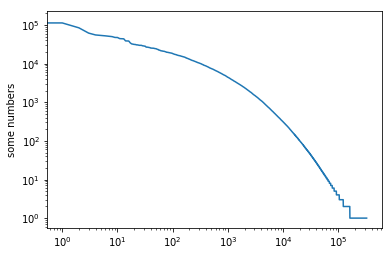

In [43]:
import matplotlib.pyplot as plt
from sortedcontainers import SortedDict
freqs = [0]*len(Voc)
priviousOffset = 0 
first = True
for i, world in enumerate(Voc): 
    freqs[i] = (Voc[world]) -priviousOffset
    priviousOffset = int(Voc[world])
freqs.sort(reverse=True)

plt.plot(freqs)
plt.ylabel('frequanc mot')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [69]:
from wordtraveller import query
from wordtraveller import faginsta
import time 
heighFreq = worldsFreq[10:100] #50 000 > x > 15 000
middelFreq = worldsFreq[1000:5000] # 4500 > x > 800 150000
lowFreq =worldsFreq[50000: 150000] # 17 > x > 2 
print(worldsFreq[3200]) #(4434, 'believes') (2077, 'coalition') (1434, 'matt')

words = ['believes', 'coalition', 'matt']
# getting the posting lists for a set of words

posting_lists_ordered_by_id = SortedDict()
posting_lists_ordered_by_score = SortedDict()
for word in words:
    orderedById, orderedByScore = query.get_posting_list(
    Voc, word, filemanager, returnPostingListOrderedByScore = True)
    if orderedById and orderedByScore:
        posting_lists_ordered_by_score[word] = orderedByScore
        posting_lists_ordered_by_id[word] = orderedById

totaleTime = [0]*100
for k in range(1,100):
    sartingTime = time.time()

    faginsta.find_fagins_ta(posting_lists_ordered_by_id, posting_lists_ordered_by_score, 0, k )

    totaleTime[k] = time.time() - sartingTime

plt.plot(freqs)
plt.ylabel('frequanc mot')
plt.show()


(1434, 'matt')
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalition
posting_list_id matt
posting_list_id believes
posting_list_id coalitio

NameError: name 'freqs' is not defined

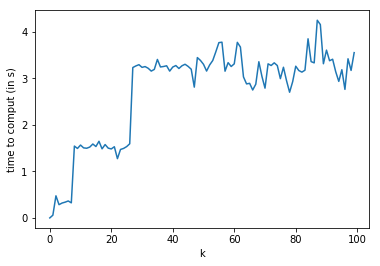

In [71]:
plt.plot(totaleTime)
plt.ylabel('time to comput (in s)')
plt.xlabel('k')
plt.show()